In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import c as clight
from astropy.constants import e as e_elec
from astropy.constants import h as hplanck
from astropy.cosmology import WMAP9 as cosmo

In [28]:
zqso=1/0.1452-1
Hz=cosmo.H(zqso).value
H0=cosmo.H(0).value

In [31]:
zqso

5.887052341597796

In [30]:
cosmo.Om0

0.2865

In [5]:
Req=18 #pMpc
xi=0.67
kapbg=10**(-24.5) #cm^-2 wrong, cm^-1

### Eq 4,7,8

In [32]:
def kap(drArr,Req,xi,kapbg):
    """
    Calculate kappa profile given inputs.

    Parameters:
    - drArr: array of radial step sizes in pMpc
    - Req: characteristic scale in pMpc, where \Gamma_qso==\Gamma_bkg assuming pure geometric dillusion
    - xi: power-law index
    - kapbg: background opacity in 1/pMpc

    Returns:
    - kapr: array of kappa values at each radial step
    """
    rArr=np.cumsum(drArr)
    kapbg*=3.08e24 #convert to 1/pMpc
    Gq_o_Gbg=np.zeros_like(rArr)
    kapr=np.zeros_like(rArr)
    kapr[0]=0
    Gq_o_Gbg[0]=(rArr[0]/Req)**(-2) #Eq7
    for i in range(1,len(rArr)):
        kapr[i]=kapbg*(1+Gq_o_Gbg[i-1])**(-xi) #Eq4
        Gq_o_Gbg[i]=Gq_o_Gbg[i-1]*(rArr[i]/rArr[i-1])**(-2)*np.exp(-kapr[i-1]*drArr[i-1]) #Eq8
    return kapr#,Gq_o_Gbg

In [7]:
drArr=np.array([0.1]*200) #pMpc
rArr=np.cumsum(drArr)

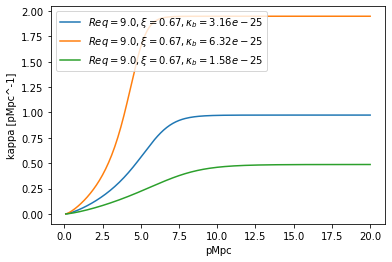

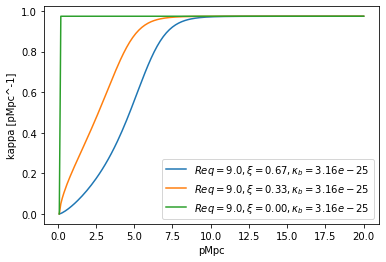

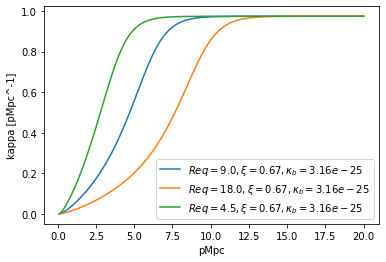

In [9]:
Req=9 #pMpc
xi=0.67
kapbg=10**(-24.5) #cm^-2 wrong, cm^-1
plt.plot(rArr,kap(drArr,Req,xi,kapbg),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

kapbg=10**(-24.5)*2 #cm^-2 wrong, cm^-1
plt.plot(rArr,kap(drArr,Req,xi,kapbg),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

kapbg=10**(-24.5)/2 #cm^-2 wrong, cm^-1
plt.plot(rArr,kap(drArr,Req,xi,kapbg),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

plt.xlabel("pMpc")
plt.ylabel("kappa [pMpc^-1]")
plt.legend()
plt.show()

Req=9 #pMpc
xi=0.67
kapbg=10**(-24.5) #cm^-2 wrong, cm^-1
plt.plot(rArr,kap(drArr,Req,xi,kapbg),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

xi=0.33 
plt.plot(rArr,kap(drArr,Req,xi,kapbg),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

xi=0
plt.plot(rArr,kap(drArr,Req,xi,kapbg),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

plt.xlabel("pMpc")
plt.ylabel("kappa [pMpc^-1]")
plt.legend()
plt.show()

Req=9 #pMpc
xi=0.67
kapbg=10**(-24.5) #cm^-2 wrong, cm^-1
plt.plot(rArr,kap(drArr,Req,xi,kapbg),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

Req=18
plt.plot(rArr,kap(drArr,Req,xi,kapbg),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

Req=4.5
plt.plot(rArr,kap(drArr,Req,xi,kapbg),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

plt.xlabel("pMpc")
plt.ylabel("kappa [pMpc^-1]")
plt.legend()
plt.show()

$$ H r = \frac{c(z_q-z')}{1+z_q} $$

$$\tau (z_{912}) = \frac{c}{H_0 \Omega_m^{1/2}}(1+z_{912})^{2.75} \int^{z_q}_{z_{912}}\kappa_{912}(z')(1+z')^{-5.25}dz' $$

<!-- $$\lambda_o=912\mathring{\rm A} (1+z_{912})$$ -->
$$\frac{\lambda_r}{912\mathring{\rm A}}=\frac{1+z_{912}}{1+z_q}$$

$$ \frac{912\mathring{\rm A}-\lambda_r}{912\mathring{\rm A}}=\frac{z_q-z_{912}}{1+z_q}=\frac{Hr}{c}$$

In [10]:
12/912*clight.to("km/s").value/Hz

5.713615996231271

In [11]:
911.76-Hz*18/clight.to("km/s").value*911.76

873.9655178301842

In [33]:
def tau_LyC(wv_rest,Req,xi,kapbg,debug=True):
    z912=wv_rest/911.76*(1+zqso)-1
#     print(z912)
    ngrid=10000
    dzpArr=np.ones(ngrid)*(zqso-z912)/ngrid
    zpArr=z912+(np.cumsum(dzpArr)-dzpArr[0]/2)
    drArr=dzpArr/Hz*clight.to("km/s").value/(1+zqso)
#     print(np.sum(drArr))
#     print((911.76-wv_rest)/911.76*clight.to("km/s").value/Hz)
    kap_zp=kap(drArr,Req,xi,kapbg)
    
    integ=(np.sum(kap_zp*(1+zpArr)**(-5.25)*dzpArr))
    tau_eff=clight.to("km/s").value/H0/cosmo.Om0**0.5*(1+z912)**2.75*integ
#     if debug==True:
#         return drArr,kap_zp,tau_eff
    return tau_eff

def convert_mfp_kapbg(wv_rest,kapbg):
    z912=wv_rest/911.76*(1+zqso)-1
    ngrid=10000
    dzpArr=np.ones(ngrid)*(zqso-z912)/ngrid
    zpArr=z912+(np.cumsum(dzpArr)-dzpArr[0]/2)
    drArr=dzpArr/Hz*clight.to("km/s").value/(1+zqso)
    kap_zp=np.ones_like(drArr)*kapbg*3.08e24
    integ=(np.sum(kap_zp*(1+zpArr)**(-5.25)*dzpArr))
    return clight.to("km/s").value/H0/cosmo.Om0**0.5*(1+z912)**2.75*integ

In [21]:
convert_mfp_kapbg(905,10**(-25))

0.9953658982683464

In [40]:
convert_mfp_kapbg(903,8e-26)

1.0571064277724507

In [36]:
zqso

5.887052341597796

In [41]:
    z912=903/911.76*(1+zqso)-1
    ngrid=10000
    dzpArr=np.ones(ngrid)*(zqso-z912)/ngrid
    zpArr=z912+(np.cumsum(dzpArr)-dzpArr[0]/2)
    drArr=dzpArr/Hz*clight.to("km/s").value/(1+zqso)

In [42]:
np.sum(drArr)

4.274393233829439

In [65]:
Req=18 #pMpc
xi=0.67
kapbg=10**(-24.5) #cm^-2 wrong, cm^-1

In [13]:
wv_rest_arr=np.linspace(911.76,800,400)

/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  Gq_o_Gbg[0]=(rArr[0]/Req)**(-2) #Eq7
/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:22: RuntimeWarning: invalid value encountered in double_scalars
  Gq_o_Gbg[i]=Gq_o_Gbg[i-1]*(rArr[i]/rArr[i-1])**(-2)*np.exp(-kapr[i-1]*drArr[i-1]) #Eq8


Text(0, 0.5, '$T$')

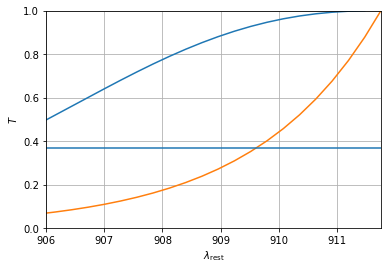

In [67]:
Req=4 #pMpc
xi=0.67
kapbg=10**(-24.5) #cm^-2 wrong, cm^-1

tau_arr=np.array([tau_LyC(wv,Req,xi,kapbg) for wv in wv_rest_arr])
tau_arr_bkg=np.array([convert_mfp_kapbg(wv,kapbg) for wv in wv_rest_arr])

plt.plot(wv_rest_arr,np.exp(-tau_arr))
plt.plot(wv_rest_arr,np.exp(-tau_arr_bkg))

plt.ylim(0,1)
# plt.xlim(820,911.76)
plt.xlim(906,911.76)

plt.hlines(1/np.e,890,911.76)
plt.grid()
plt.xlabel(r"$\lambda_{\rm rest}$")
plt.ylabel(r"$T$")

In [68]:
(911.76-909.5)/911.76*clight.to("km/s").value*(1+zqso)/Hz

7.534432895715853

In [69]:
(911.76-895)/911.76*clight.to("km/s").value*(1+zqso)/Hz

55.8748209434505

/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  Gq_o_Gbg[0]=(rArr[0]/Req)**(-2) #Eq7
/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:22: RuntimeWarning: invalid value encountered in double_scalars
  Gq_o_Gbg[i]=Gq_o_Gbg[i-1]*(rArr[i]/rArr[i-1])**(-2)*np.exp(-kapr[i-1]*drArr[i-1]) #Eq8
/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  Gq_o_Gbg[0]=(rArr[0]/Req)**(-2) #Eq7
/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:22: RuntimeWarning: invalid value encountered in double_scalars
  Gq_o_Gbg[i]=Gq_o_Gbg[i-1]*(rArr[i]/rArr[i-1])**(-2)*np.exp(-kapr[i-1]*drArr[i-1]) #Eq8
/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  Gq_o_Gbg[0]=(rArr[0]/Req

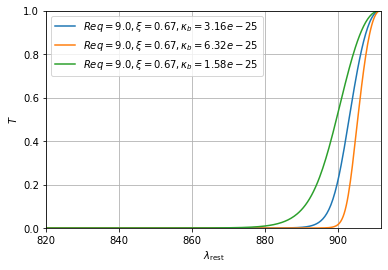

/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  Gq_o_Gbg[0]=(rArr[0]/Req)**(-2) #Eq7
/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:22: RuntimeWarning: invalid value encountered in double_scalars
  Gq_o_Gbg[i]=Gq_o_Gbg[i-1]*(rArr[i]/rArr[i-1])**(-2)*np.exp(-kapr[i-1]*drArr[i-1]) #Eq8
/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  Gq_o_Gbg[0]=(rArr[0]/Req)**(-2) #Eq7
/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:22: RuntimeWarning: invalid value encountered in double_scalars
  Gq_o_Gbg[i]=Gq_o_Gbg[i-1]*(rArr[i]/rArr[i-1])**(-2)*np.exp(-kapr[i-1]*drArr[i-1]) #Eq8
/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  Gq_o_Gbg[0]=(rArr[0]/Req

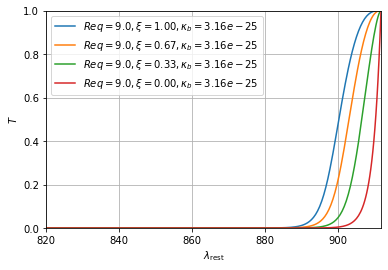

/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  Gq_o_Gbg[0]=(rArr[0]/Req)**(-2) #Eq7
/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:22: RuntimeWarning: invalid value encountered in double_scalars
  Gq_o_Gbg[i]=Gq_o_Gbg[i-1]*(rArr[i]/rArr[i-1])**(-2)*np.exp(-kapr[i-1]*drArr[i-1]) #Eq8
/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  Gq_o_Gbg[0]=(rArr[0]/Req)**(-2) #Eq7
/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:22: RuntimeWarning: invalid value encountered in double_scalars
  Gq_o_Gbg[i]=Gq_o_Gbg[i-1]*(rArr[i]/rArr[i-1])**(-2)*np.exp(-kapr[i-1]*drArr[i-1]) #Eq8
/var/folders/wt/w4gtm_155rn_bwd5w6kx9klm0000gp/T/ipykernel_88845/3517718714.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  Gq_o_Gbg[0]=(rArr[0]/Req

Text(0, 0.5, '$T$')

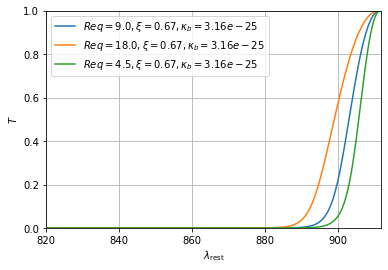

In [71]:
Req=9 #pMpc
xi=0.67
kapbg=10**(-24.5) #cm^-2 wrong, cm^-1

tau_arr=np.array([tau_LyC(wv,Req,xi,kapbg) for wv in wv_rest_arr])

plt.plot(wv_rest_arr,np.exp(-tau_arr),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

kapbg=10**(-24.5)*2 #cm^-2 wrong, cm^-1
tau_arr=np.array([tau_LyC(wv,Req,xi,kapbg) for wv in wv_rest_arr])
plt.plot(wv_rest_arr,np.exp(-tau_arr),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

kapbg=10**(-24.5)/2 #cm^-2 wrong, cm^-1
tau_arr=np.array([tau_LyC(wv,Req,xi,kapbg) for wv in wv_rest_arr])
plt.plot(wv_rest_arr,np.exp(-tau_arr),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

plt.ylim(0,1)
# plt.xlim(820,911.76)
plt.xlim(820,911.76)
plt.legend()
# plt.hlines(1/np.e,890,911.76)
plt.grid()
plt.xlabel(r"$\lambda_{\rm rest}$")
plt.ylabel(r"$T$")
plt.show()


Req=9 #pMpc

xi=1
kapbg=10**(-24.5) #cm^-2 wrong, cm^-1
tau_arr=np.array([tau_LyC(wv,Req,xi,kapbg) for wv in wv_rest_arr])
plt.plot(wv_rest_arr,np.exp(-tau_arr),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

xi=0.67
kapbg=10**(-24.5) #cm^-2 wrong, cm^-1
tau_arr=np.array([tau_LyC(wv,Req,xi,kapbg) for wv in wv_rest_arr])
plt.plot(wv_rest_arr,np.exp(-tau_arr),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

xi=0.33
tau_arr=np.array([tau_LyC(wv,Req,xi,kapbg) for wv in wv_rest_arr])
plt.plot(wv_rest_arr,np.exp(-tau_arr),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

xi=0.
tau_arr=np.array([tau_LyC(wv,Req,xi,kapbg) for wv in wv_rest_arr])
plt.plot(wv_rest_arr,np.exp(-tau_arr),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))
plt.ylim(0,1)
# plt.xlim(820,911.76)
plt.xlim(820,911.76)
plt.legend()
# plt.hlines(1/np.e,890,911.76)
plt.grid()
plt.xlabel(r"$\lambda_{\rm rest}$")
plt.ylabel(r"$T$")
plt.show()

Req=9 #pMpc
xi=0.67
kapbg=10**(-24.5) #cm^-2 wrong, cm^-1
tau_arr=np.array([tau_LyC(wv,Req,xi,kapbg) for wv in wv_rest_arr])
plt.plot(wv_rest_arr,np.exp(-tau_arr),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

Req=18
tau_arr=np.array([tau_LyC(wv,Req,xi,kapbg) for wv in wv_rest_arr])
plt.plot(wv_rest_arr,np.exp(-tau_arr),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))

Req=4.5
tau_arr=np.array([tau_LyC(wv,Req,xi,kapbg) for wv in wv_rest_arr])
plt.plot(wv_rest_arr,np.exp(-tau_arr),label=r"$Req={:3.1f},\xi={:4.2f},\kappa_b={:4.2e}$".format(Req,xi,kapbg))



plt.ylim(0,1)
# plt.xlim(820,911.76)
plt.xlim(820,911.76)
plt.legend()
# plt.hlines(1/np.e,890,911.76)
plt.grid()
plt.xlabel(r"$\lambda_{\rm rest}$")
plt.ylabel(r"$T$")